In [1]:
import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import researchpy as rp
from scipy.stats import levene
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy.stats import kstest

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [2]:
df_casual = pd.read_pickle('../datos_finales/archivo_casual.pkl')
df_casual.head(2)

,estacion,año,mes,festivo,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,usuarios_casuales
0,invierno,2018,Enero,si,Lunes,festivo,nuboso,14.110847,80.5833,10.749882,331
1,invierno,2018,Enero,no,Martes,laborable,nuboso,14.902598,69.6087,16.652113,131


In [3]:
df_registrados = pd.read_pickle('../datos_finales/archivo_registrados.pkl')
df_registrados.head(2)

,estacion,año,mes,festivo,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,usuarios_registrados
0,invierno,2018,Enero,si,Lunes,festivo,nuboso,14.110847,80.5833,10.749882,654
1,invierno,2018,Enero,no,Martes,laborable,nuboso,14.902598,69.6087,16.652113,670


In [4]:
df_total = pd.read_pickle('../datos_finales/archivo_total.pkl')
df_total.head(2)

,estacion,año,mes,festivo,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,total_usuarios
0,invierno,2018,Enero,si,Lunes,festivo,nuboso,14.110847,80.5833,10.749882,985
1,invierno,2018,Enero,no,Martes,laborable,nuboso,14.902598,69.6087,16.652113,801


Hemos comprobado la normalidad y ninguno la cumple.

### HOMOCEDASTICIDAD

- Para el modelo de usuarios casuales

In [6]:
numericas = df_casual.select_dtypes(include = np.number).drop('año', axis = 1)

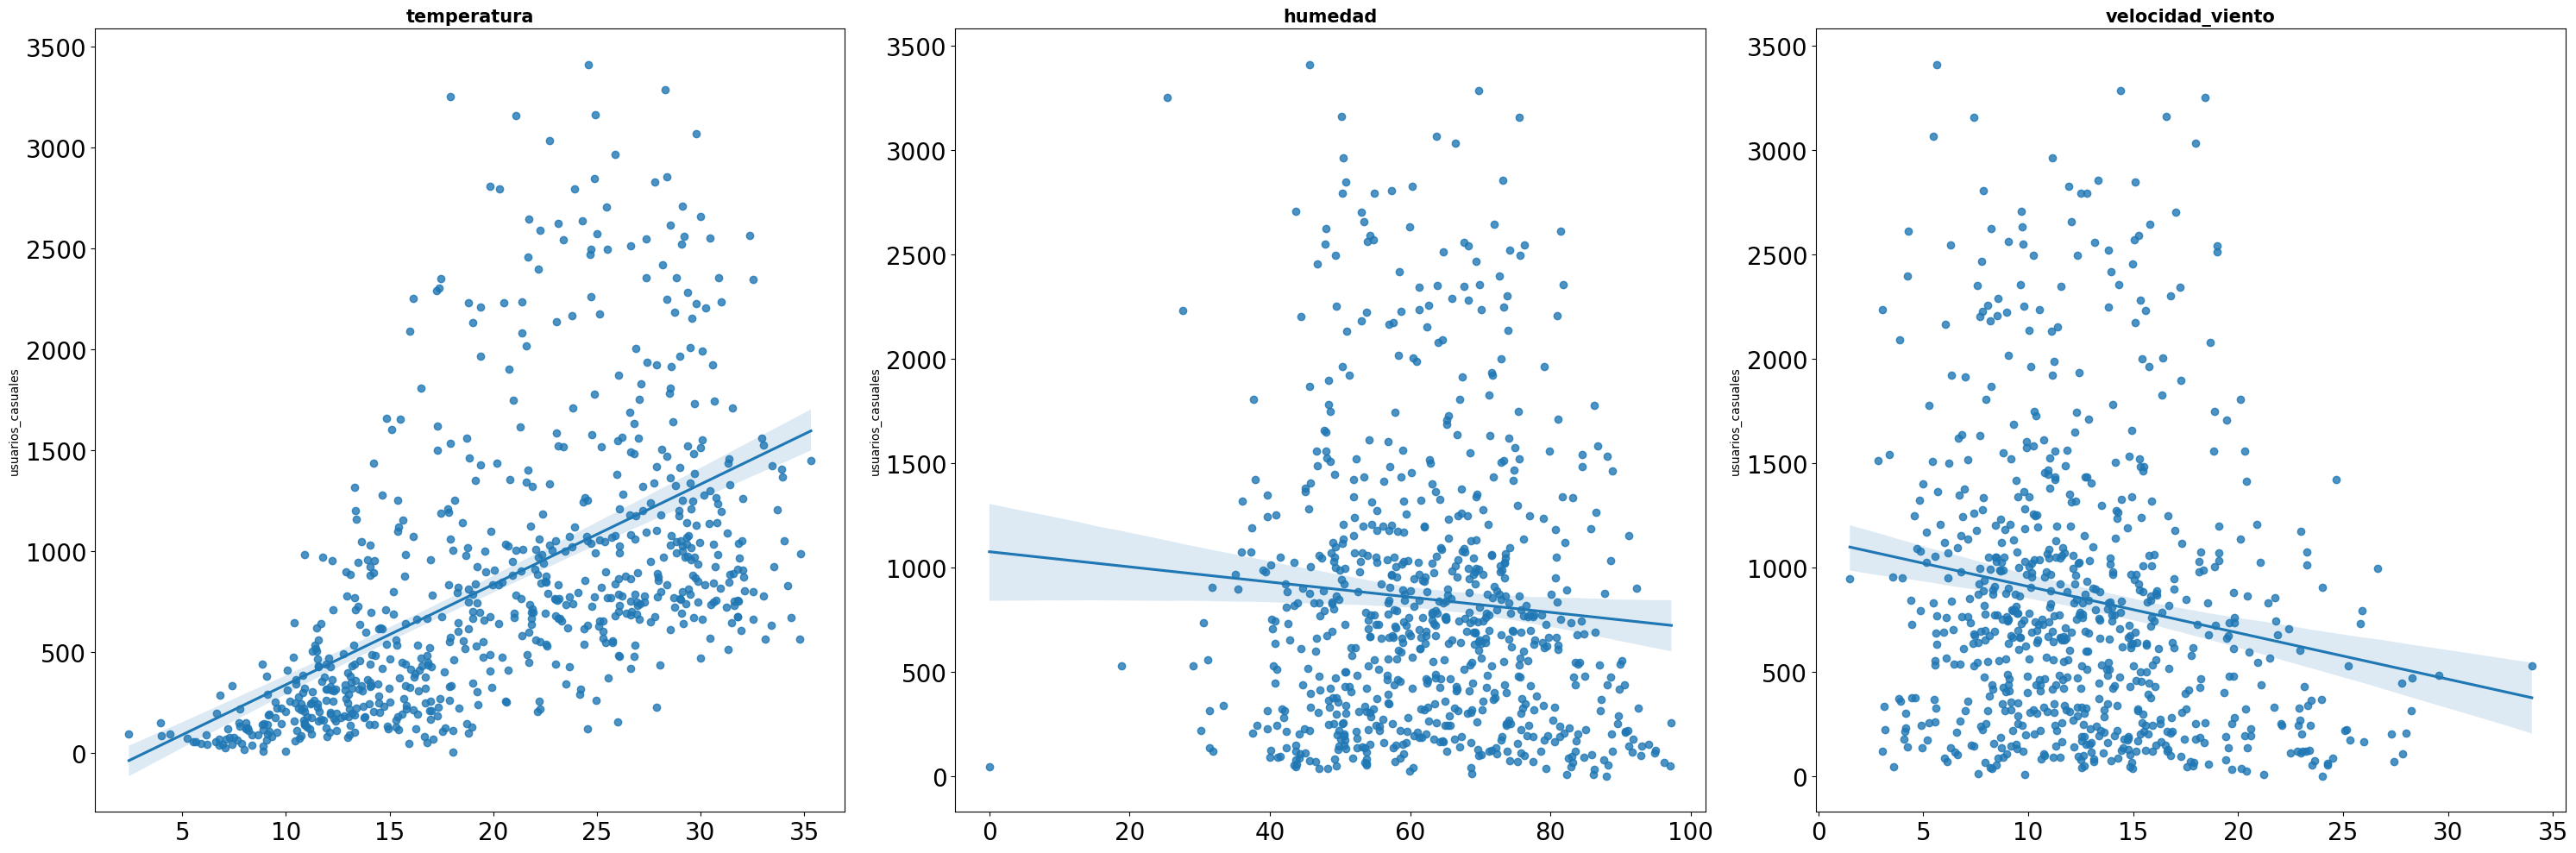

In [8]:
predictoras_col = numericas.drop('usuarios_casuales', axis= 1).columns

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

axes = axes.flat

for i, colum in enumerate(predictoras_col): 
    sns.regplot(
        data = df_casual,
        x = colum,
        y = 'usuarios_casuales',
        ax = axes[i])

    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    axes[i].tick_params(labelsize = 20)

    axes[i].set_xlabel("")

fig.tight_layout();

In [13]:
resultados = {}

for col in predictoras_col:

    statistic, p_val = levene(df_casual[col], df_casual.usuarios_casuales, center='median')

    resultados[col] = p_val

resultados

{'temperatura': 1.5499266458859592e-138,
 'humedad': 3.005457909292799e-136,
 'velocidad_viento': 1.2474027143326703e-139}

Como observamos tanto de forma visual como analítica, las variables no cumplen la asunción de homocedasticidad 

- Para el modelo de usuarios registrados

In [9]:
numericas_regist = df_registrados.select_dtypes(include = np.number).drop('año', axis = 1)

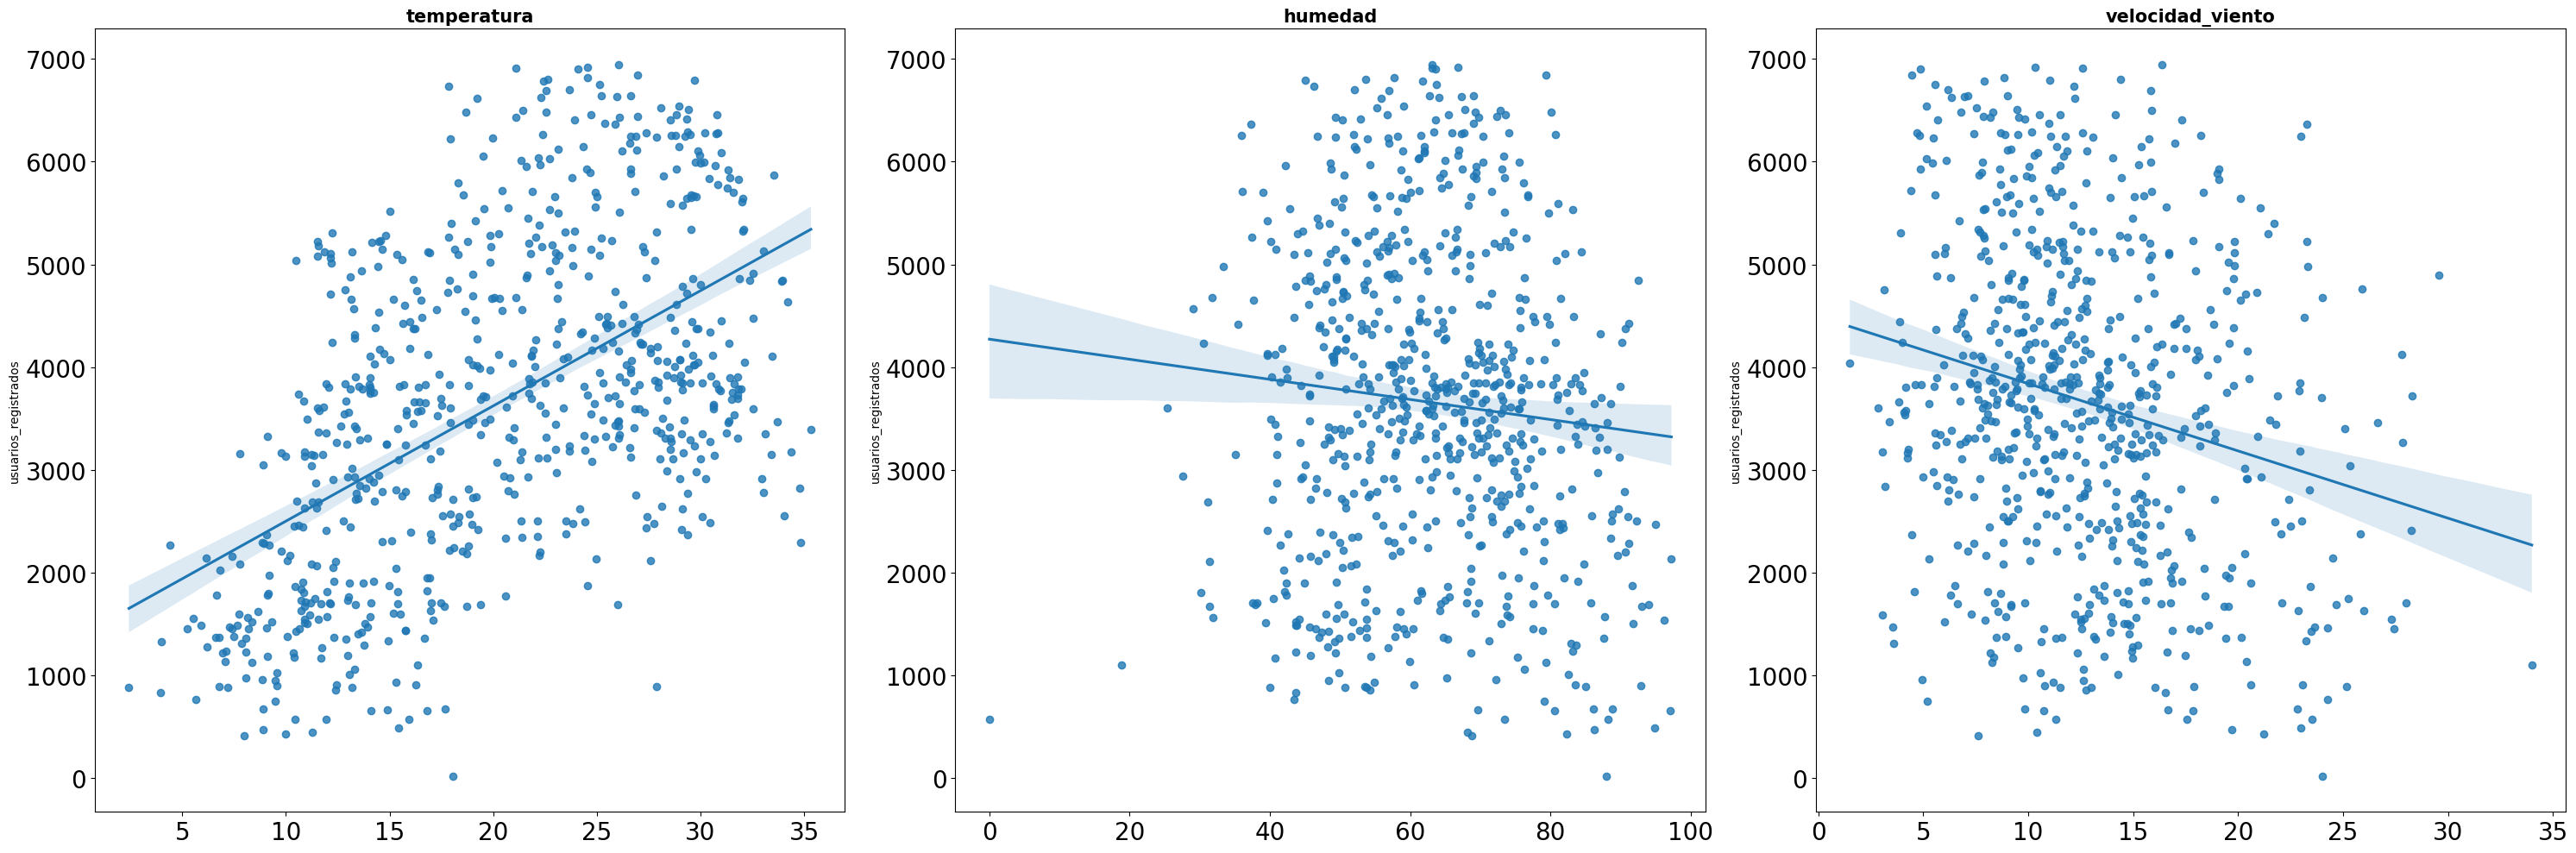

In [11]:
predictoras_col = numericas_regist.drop('usuarios_registrados', axis= 1).columns

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

axes = axes.flat

for i, colum in enumerate(predictoras_col): 
    sns.regplot(
        data = df_registrados,
        x = colum,
        y = 'usuarios_registrados',
        ax = axes[i])

    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    axes[i].tick_params(labelsize = 20)

    axes[i].set_xlabel("")

fig.tight_layout();

In [14]:
resultados = {}

for col in predictoras_col:

    statistic, p_val = levene(df_registrados[col], df_registrados.usuarios_registrados, center='median')

    resultados[col] = p_val

resultados

{'temperatura': 6.240911065291662e-213,
 'humedad': 1.136974192566387e-211,
 'velocidad_viento': 1.5554098904763574e-213}

Como observamos tanto de forma visual como analítica, las variables no cumplen la asunción de homocedasticidad 

- Para el modelo de usuarios totales

In [17]:
numericas_total = df_total.select_dtypes(include = np.number).drop('año', axis = 1)

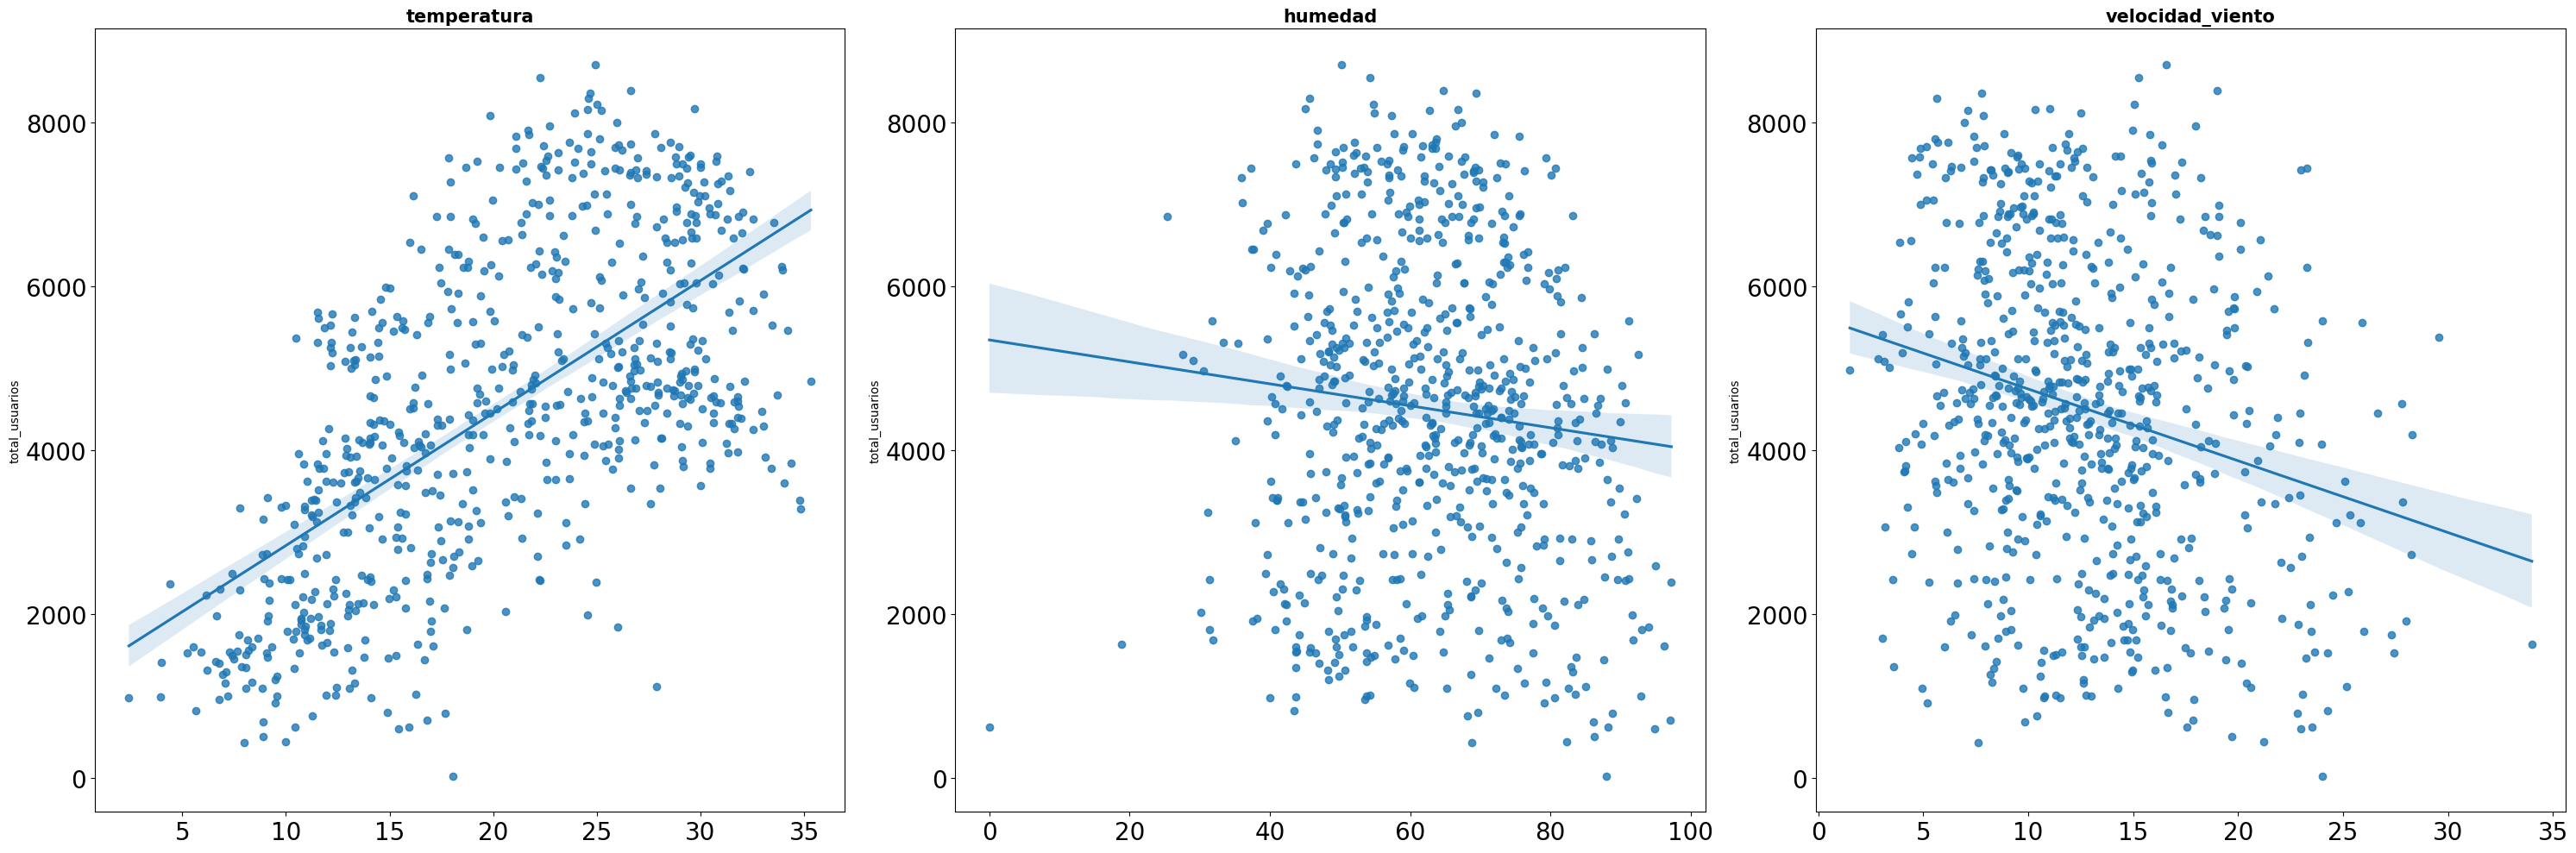

In [18]:
predictoras_col = numericas_total.drop('total_usuarios', axis= 1).columns

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

axes = axes.flat

for i, colum in enumerate(predictoras_col): 
    sns.regplot(
        data = df_total,
        x = colum,
        y = 'total_usuarios',
        ax = axes[i])

    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    axes[i].tick_params(labelsize = 20)

    axes[i].set_xlabel("")

fig.tight_layout();

In [19]:
resultados = {}

for col in predictoras_col:

    statistic, p_val = levene(df_total[col], df_total.total_usuarios, center='median')

    resultados[col] = p_val

resultados

{'temperatura': 2.4833393575116467e-220,
 'humedad': 2.6596694420929708e-219,
 'velocidad_viento': 7.971838325935599e-221}

Como observamos tanto de forma visual como analítica, las variables no cumplen la asunción de homocedasticidad 

### Conclusión

No podemos hacer un modelo de Regresión Lineal, haremos un Decision Tree o un Random Forest